### Flight Prediction

In [2]:
## A Dataset
## find the chepest and expnsove flight
# first do eda
# ML model
# find a sweet spot cheap flight

In [3]:
## first step
## EDA


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
X_train = pd.read_csv("X_train.csv")


In [6]:
y_train = pd.read_csv("y_train.csv")

In [7]:
X_test = pd.read_csv("X_test.csv")

In [8]:
X_test.shape

(4532489, 10)

In [9]:
y_train.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [10]:
#take samples out
# merge two datasets

In [11]:
df = pd.concat([X_train,y_train],axis=1)

In [12]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0


In [13]:
df.sample(12)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
12309783,12309783,2021-07-02 09:41:59.143468+00:00,x,y,2021-09-03 11:00:00+00:00,2021-09-03 12:55:00+00:00,beta,True,40.0,0,b-69,12309783,8140.0
8822316,8822316,2021-06-05 15:50:40.134069+00:00,x,y,2021-06-25 11:00:00+00:00,2021-06-25 13:00:00+00:00,gamma,True,20.0,1,c-4,8822316,10900.0
10942210,10942210,2021-06-23 12:49:47.616478+00:00,x,y,2021-07-23 14:00:00+00:00,2021-07-23 15:55:00+00:00,beta,True,20.0,0,b-9,10942210,6386.0
16389903,16389903,2021-07-29 09:41:31.100130+00:00,x,y,2021-08-02 10:00:00+00:00,2021-08-02 12:00:00+00:00,gamma,True,20.0,1,c-2,16389903,10040.0
13798074,13798074,2021-07-10 12:04:43.338458+00:00,x,y,2021-07-14 11:00:00+00:00,2021-07-14 12:55:00+00:00,beta,True,40.0,0,b-69,13798074,15390.0
1704705,1704705,2021-02-15 08:08:13.345177+00:00,x,y,2021-03-31 17:00:00+00:00,2021-03-31 18:59:00+00:00,gamma,True,32.0,2,c-6,1704705,13750.0
15397139,15397139,2021-07-22 08:58:22.648807+00:00,x,y,2021-08-22 04:00:00+00:00,2021-08-22 06:00:00+00:00,alpha,True,15.0,1,a-1,15397139,9045.0
9314989,9314989,2021-06-10 14:31:10.907337+00:00,x,y,2021-06-23 17:00:00+00:00,2021-06-23 18:59:00+00:00,gamma,True,20.0,2,c-6,9314989,11900.0
10835884,10835884,2021-06-22 15:48:20.026366+00:00,x,y,2021-07-02 13:00:00+00:00,2021-07-02 15:00:00+00:00,alpha,True,35.0,1,a-9,10835884,11072.0
17151527,17151527,2021-08-04 19:46:45.233463+00:00,x,y,2021-08-06 07:40:00+00:00,2021-08-06 09:40:00+00:00,alpha,True,20.0,1,a-5,17151527,7524.0


In [14]:
df.shape

(21776590, 13)

In [15]:
df.sample(5000)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
11909137,11909137,2021-06-30 03:34:42.071501+00:00,x,y,2021-07-12 07:00:00+00:00,2021-07-12 09:00:00+00:00,alpha,True,15.0,1,a-5,11909137,7900.0
16763061,16763061,2021-08-01 13:07:59.427389+00:00,x,y,2021-08-02 14:00:00+00:00,2021-08-02 15:55:00+00:00,beta,True,40.0,0,b-9,16763061,15630.0
6455191,6455191,2021-05-09 03:00:08.059657+00:00,x,y,2021-05-23 17:00:00+00:00,2021-05-23 18:59:00+00:00,gamma,True,20.0,1,c-6,6455191,7390.0
17315460,17315460,2021-08-06 04:28:29.217514+00:00,x,y,2021-08-15 04:00:00+00:00,2021-08-15 06:00:00+00:00,alpha,True,20.0,1,a-1,17315460,7524.0
6824390,6824390,2021-05-15 06:25:27.678411+00:00,x,y,2021-05-22 11:00:00+00:00,2021-05-22 13:00:00+00:00,gamma,True,20.0,1,c-4,6824390,7640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158641,10158641,2021-06-17 00:45:00.914439+00:00,x,y,2021-06-26 14:00:00+00:00,2021-06-26 16:00:00+00:00,gamma,True,20.0,2,c-4,10158641,7620.0
2323772,2323772,2021-02-28 12:04:59.344134+00:00,x,y,2021-03-13 13:30:00+00:00,2021-03-13 15:40:00+00:00,alpha,True,15.0,1,a-5,2323772,7502.0
519542,519542,2021-01-15 16:41:20.869379+00:00,x,y,2021-01-20 05:00:00+00:00,2021-01-20 07:00:00+00:00,gamma,True,32.0,2,c-2,519542,9645.0
2782939,2782939,2021-03-07 14:12:47.254580+00:00,x,y,2021-03-27 14:00:00+00:00,2021-03-27 15:55:00+00:00,beta,True,40.0,0,b-9,2782939,7895.0


In [16]:
df = df.sample(5000)

In [17]:
df.shape

(5000, 13)

In [18]:
df.to_csv("sastticket.csv")

In [19]:
X_test.sample(250).to_csv("sastaticket_test.csv")

In [20]:
df_test = pd.read_csv("sastaticket_test.csv")

In [21]:
## now eda nalaysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10523854 to 16858565
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   float64
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  Unnamed: 0  5000 non-null   int64  
 12  target      5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 512.7+ KB


In [23]:
df.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [24]:
df.describe()

,Unnamed: 0,f8,f9,Unnamed: 0,target
count,5.000000e+03,5000.00000,5000.000000,5.000000e+03,5000.000000
mean,1.101557e+07,22.63600,0.957200,1.101557e+07,10160.470000
std,6.221770e+06,8.76806,0.604517,6.221770e+06,3456.619042
min,6.400000e+02,0.00000,0.000000,6.400000e+02,4990.000000
25%,5.702017e+06,20.00000,1.000000,5.702017e+06,7870.000000
50%,1.107250e+07,20.00000,1.000000,1.107250e+07,9403.000000
75%,1.642624e+07,32.00000,1.000000,1.642624e+07,11282.000000
max,2.177596e+07,45.00000,2.000000,2.177596e+07,35000.000000


In [25]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
10523854,10523854,2021-06-20 06:19:44.395210+00:00,x,y,2021-09-11 13:00:00+00:00,2021-09-11 15:00:00+00:00,alpha,True,35.0,1,a-9,10523854,7124.0
19046479,19046479,2021-08-14 10:12:15.581991+00:00,x,y,2021-09-24 05:00:00+00:00,2021-09-24 07:00:00+00:00,alpha,True,20.0,1,a-1,19046479,7524.0
6501169,6501169,2021-05-09 17:46:07.523989+00:00,x,y,2021-05-29 05:00:00+00:00,2021-05-29 07:00:00+00:00,alpha,True,15.0,1,a-1,6501169,7796.0
13926072,13926072,2021-07-11 09:20:53.096692+00:00,x,y,2021-07-18 13:00:00+00:00,2021-07-18 15:00:00+00:00,alpha,True,15.0,1,a-9,13926072,14945.0
17290617,17290617,2021-08-05 19:45:14.256419+00:00,x,y,2021-08-07 17:05:00+00:00,2021-08-07 19:05:00+00:00,omega,True,20.0,1,d-5,17290617,7950.0


In [26]:
## now finding uniqye value

In [27]:
df['f2'].unique()

array(['x'], dtype=object)

In [28]:
lists = ['f2','f3','f6','f8','f9','f10']

In [29]:
# beacuase we will run lopp to find unique values

In [30]:
for i in lists:
    print(i,df[i].unique())

f2 ['x']
f3 ['y']
f6 ['alpha' 'omega' 'gamma' 'beta']
f8 [35. 20. 15. 40.  0. 32. 45.]
f9 [1 2 0]
f10 ['a-9' 'a-1' 'd-5' 'c-4' 'c-6' 'b-1' 'b-69' 'a-7' 'b-67' 'a-23' 'c-2'
 'a-5' 'b-9' 'd-3' 'd-1' 'b-73' 'b-19' 'b-319' 'b-369']


In [31]:
#f2 mean f2: Origin mean from where passenger takeoff.Like lahore to islamabad,so lahore is origin
#f3 mean destination.Lahore to islamabad so islamabd is desitnation
# we will remove these columns because we dont need that columns to test or train,they havnt more impact on data
#f10 is flight number we will remove also


In [32]:
df.drop(['f2','f3','f10','Unnamed: 0'],axis=1,inplace=True)

In [33]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
10523854,2021-06-20 06:19:44.395210+00:00,2021-09-11 13:00:00+00:00,2021-09-11 15:00:00+00:00,alpha,True,35.0,1,7124.0
19046479,2021-08-14 10:12:15.581991+00:00,2021-09-24 05:00:00+00:00,2021-09-24 07:00:00+00:00,alpha,True,20.0,1,7524.0
6501169,2021-05-09 17:46:07.523989+00:00,2021-05-29 05:00:00+00:00,2021-05-29 07:00:00+00:00,alpha,True,15.0,1,7796.0
13926072,2021-07-11 09:20:53.096692+00:00,2021-07-18 13:00:00+00:00,2021-07-18 15:00:00+00:00,alpha,True,15.0,1,14945.0
17290617,2021-08-05 19:45:14.256419+00:00,2021-08-07 17:05:00+00:00,2021-08-07 19:05:00+00:00,omega,True,20.0,1,7950.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10523854 to 16858565
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 317.4+ KB


In [35]:
## change object to datetime


from datetime import date,datetime
df['f1']=pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])
df['f5'] = pd.to_datetime(df['f5'])

In [38]:
#now minus the f4 which is departure time with f1 which is ticket purchase time 
#and also minus the f5 arrival date time and time with f4 depature date and time
df.insert(0,"Time_to_dep(s)",((df['f4']-df['f1']).astype("timedelta64[s]")),True)
df.insert(1,"Travel_time(s)",((df['f5']-df['f4']).astype("timedelta64[s]")),True)


In [39]:
df.isnull().sum()

Time_to_dep(s)    0
Travel_time(s)    0
Time_to_dep(s)    0
Travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

In [40]:
df.head()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
10523854,7195215.0,7200.0,7195215.0,7200.0,2021-06-20 06:19:44.395210+00:00,2021-09-11 13:00:00+00:00,2021-09-11 15:00:00+00:00,alpha,True,35.0,1,7124.0
19046479,3523664.0,7200.0,3523664.0,7200.0,2021-08-14 10:12:15.581991+00:00,2021-09-24 05:00:00+00:00,2021-09-24 07:00:00+00:00,alpha,True,20.0,1,7524.0
6501169,1682032.0,7200.0,1682032.0,7200.0,2021-05-09 17:46:07.523989+00:00,2021-05-29 05:00:00+00:00,2021-05-29 07:00:00+00:00,alpha,True,15.0,1,7796.0
13926072,617946.0,7200.0,617946.0,7200.0,2021-07-11 09:20:53.096692+00:00,2021-07-18 13:00:00+00:00,2021-07-18 15:00:00+00:00,alpha,True,15.0,1,14945.0
17290617,163185.0,7200.0,163185.0,7200.0,2021-08-05 19:45:14.256419+00:00,2021-08-07 17:05:00+00:00,2021-08-07 19:05:00+00:00,omega,True,20.0,1,7950.0


In [41]:
# now separate the category coumn with numerical columns
cat_cols = ['f6','f7','f8','f9']
num_cols = ['Time_to_dep(s)','Travel_time(s)']

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Biscode\anaconda

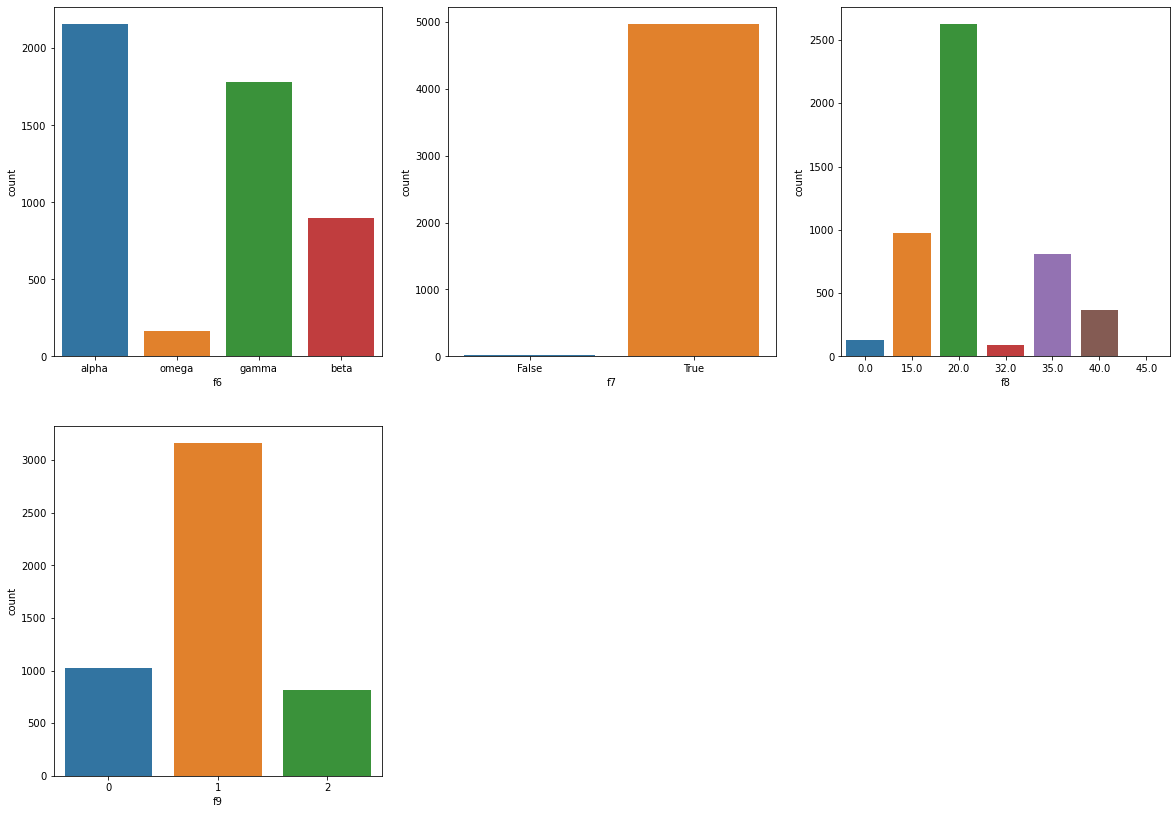

In [42]:
# Plotting Catergorical 
c=1
plt.figure(figsize=(20,45))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    c=c+1
plt.show()

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


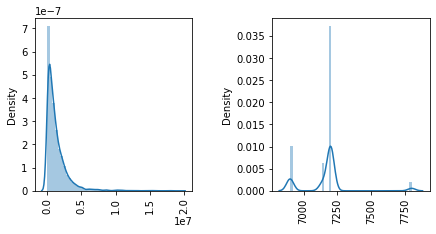

In [50]:
#plotting numerical 
c=1
plt.figure(figsize=(10,20))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    plt.xticks(rotation =90)
    plt.tight_layout(pad =3.0)
    c=c+1
plt.show()

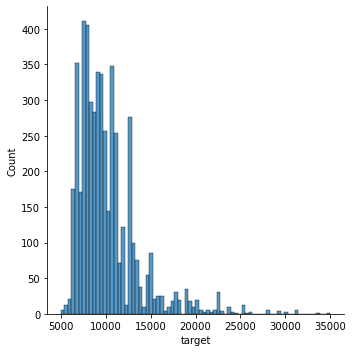

In [51]:
sns.displot(df.target)

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

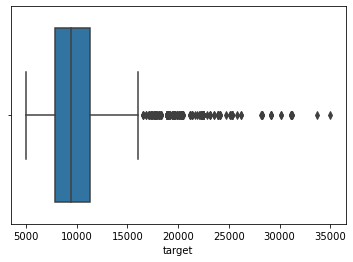

In [52]:
sns.boxplot(df.target)

In [69]:
print(np.where(df['target'] > 17000))

(array([  15,   39,  119,  127,  142,  193,  225,  232,  269,  277,  289,
        297,  331,  337,  338,  348,  381,  382,  439,  452,  457,  556,
        557,  561,  564,  618,  623,  647,  659,  691,  692,  750,  797,
        808,  822,  842,  859,  868,  884,  903,  906,  909,  922,  930,
       1015, 1018, 1027, 1051, 1059, 1070, 1077, 1096, 1108, 1112, 1138,
       1139, 1175, 1210, 1218, 1226, 1239, 1244, 1250, 1258, 1304, 1328,
       1331, 1351, 1352, 1390, 1415, 1447, 1454, 1495, 1507, 1525, 1573,
       1579, 1616, 1641, 1648, 1655, 1669, 1672, 1675, 1678, 1712, 1720,
       1741, 1769, 1780, 1782, 1793, 1804, 1811, 1814, 1826, 1836, 1851,
       1859, 1872, 1897, 1902, 1947, 1952, 1971, 2023, 2034, 2035, 2036,
       2039, 2043, 2075, 2103, 2147, 2169, 2247, 2263, 2279, 2299, 2304,
       2308, 2329, 2332, 2347, 2354, 2403, 2461, 2463, 2468, 2483, 2491,
       2497, 2509, 2582, 2591, 2602, 2610, 2617, 2622, 2632, 2637, 2648,
       2675, 2696, 2706, 2714, 2760, 2773, 2801, 2

In [70]:
df['target'].mean()

10160.47

In [71]:
print(np.where(df['target'] < 16000))

(array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int64),)


In [72]:
df1 = df[df['target']<16000]

In [76]:
# Detect outliers with IQR

In [77]:
df.describe()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f8,f9,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000,5000.000000
mean,1.338716e+06,7161.876000,1.338716e+06,7161.876000,22.63600,0.957200,10160.470000
std,1.640579e+06,169.697849,1.640579e+06,169.697849,8.76806,0.604517,3456.619042
min,1.938000e+03,6900.000000,1.938000e+03,6900.000000,0.00000,0.000000,4990.000000
25%,3.492730e+05,7140.000000,3.492730e+05,7140.000000,20.00000,1.000000,7870.000000
50%,8.643320e+05,7200.000000,8.643320e+05,7200.000000,20.00000,1.000000,9403.000000
75%,1.727807e+06,7200.000000,1.727807e+06,7200.000000,32.00000,1.000000,11282.000000
max,1.932566e+07,7800.000000,1.932566e+07,7800.000000,45.00000,2.000000,35000.000000


In [81]:
Q1 =df.target.quantile(0.25)
Q3 = df.target.quantile(0.75)

In [83]:
Q1,Q3

(7870.0, 11282.0)

In [84]:
IQR = Q3-Q1
IQR

3412.0

In [85]:
Lower_limit = Q1 -1.5*IQR
High_limit = Q3 + 1.5*IQR
Lower_limit,High_limit

(2752.0, 16400.0)

In [88]:
df[(df.target<Lower_limit) | (df.target>High_limit)]


,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
19681340,241446.0,7200.0,241446.0,7200.0,2021-08-17 18:25:53.061096+00:00,2021-08-20 13:30:00+00:00,2021-08-20 15:30:00+00:00,alpha,True,20.0,1,17745.0
14506762,291225.0,6900.0,291225.0,6900.0,2021-07-15 05:06:14.369915+00:00,2021-07-18 14:00:00+00:00,2021-07-18 15:55:00+00:00,beta,True,40.0,0,17620.0
17852407,22498.0,7200.0,22498.0,7200.0,2021-08-09 00:45:01.238273+00:00,2021-08-09 07:00:00+00:00,2021-08-09 09:00:00+00:00,alpha,True,20.0,1,22445.0
19571647,442827.0,7200.0,442827.0,7200.0,2021-08-17 07:34:32.874591+00:00,2021-08-22 10:35:00+00:00,2021-08-22 12:35:00+00:00,omega,True,20.0,1,22300.0
20449350,148259.0,7200.0,148259.0,7200.0,2021-08-22 10:49:00.234170+00:00,2021-08-24 04:00:00+00:00,2021-08-24 06:00:00+00:00,alpha,True,20.0,1,22445.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13391923,839218.0,7200.0,839218.0,7200.0,2021-07-07 19:53:01.113728+00:00,2021-07-17 13:00:00+00:00,2021-07-17 15:00:00+00:00,alpha,True,35.0,1,19545.0
18866669,794556.0,7200.0,794556.0,7200.0,2021-08-13 11:17:23.679300+00:00,2021-08-22 16:00:00+00:00,2021-08-22 18:00:00+00:00,alpha,True,20.0,1,22445.0
11158233,808092.0,7200.0,808092.0,7200.0,2021-06-25 05:31:47.150391+00:00,2021-07-04 14:00:00+00:00,2021-07-04 16:00:00+00:00,gamma,True,20.0,2,20105.0
13960219,350908.0,7200.0,350908.0,7200.0,2021-07-11 12:31:31.594303+00:00,2021-07-15 14:00:00+00:00,2021-07-15 16:00:00+00:00,gamma,True,20.0,2,18345.0


In [89]:
# there are 268 rows that considered to be outliers according to IQR

In [90]:
# now remove the outliers


In [93]:
df_no_outliers = df[(df.target> Lower_limit)&(df.target< High_limit)]

In [94]:
df_no_outliers

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
10523854,7195215.0,7200.0,7195215.0,7200.0,2021-06-20 06:19:44.395210+00:00,2021-09-11 13:00:00+00:00,2021-09-11 15:00:00+00:00,alpha,True,35.0,1,7124.0
19046479,3523664.0,7200.0,3523664.0,7200.0,2021-08-14 10:12:15.581991+00:00,2021-09-24 05:00:00+00:00,2021-09-24 07:00:00+00:00,alpha,True,20.0,1,7524.0
6501169,1682032.0,7200.0,1682032.0,7200.0,2021-05-09 17:46:07.523989+00:00,2021-05-29 05:00:00+00:00,2021-05-29 07:00:00+00:00,alpha,True,15.0,1,7796.0
13926072,617946.0,7200.0,617946.0,7200.0,2021-07-11 09:20:53.096692+00:00,2021-07-18 13:00:00+00:00,2021-07-18 15:00:00+00:00,alpha,True,15.0,1,14945.0
17290617,163185.0,7200.0,163185.0,7200.0,2021-08-05 19:45:14.256419+00:00,2021-08-07 17:05:00+00:00,2021-08-07 19:05:00+00:00,omega,True,20.0,1,7950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17299949,319583.0,7200.0,319583.0,7200.0,2021-08-05 21:13:36.039542+00:00,2021-08-09 14:00:00+00:00,2021-08-09 16:00:00+00:00,gamma,True,20.0,1,6870.0
5960793,1163229.0,7200.0,1163229.0,7200.0,2021-05-01 17:52:50.327014+00:00,2021-05-15 05:00:00+00:00,2021-05-15 07:00:00+00:00,gamma,True,20.0,1,7640.0
15153808,139159.0,7200.0,139159.0,7200.0,2021-07-20 01:20:40.925164+00:00,2021-07-21 16:00:00+00:00,2021-07-21 18:00:00+00:00,alpha,True,15.0,1,6810.0
4353492,245481.0,6900.0,245481.0,6900.0,2021-04-07 08:48:38.642751+00:00,2021-04-10 05:00:00+00:00,2021-04-10 06:55:00+00:00,beta,True,20.0,0,8050.0


In [95]:
# so there are 4732 rows with now outliers

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

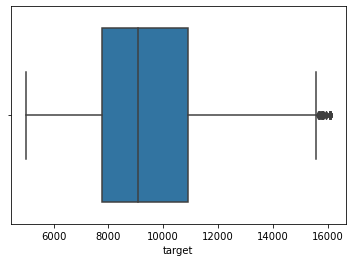

In [96]:
sns.boxplot(df_no_outliers.target)

In [98]:
#this better explain when to or not keep outliers 
# https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ 

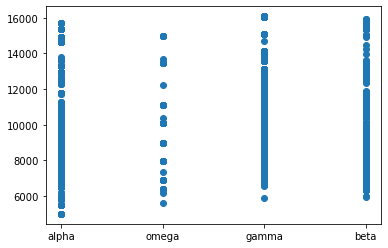

In [99]:
plt.scatter(df_no_outliers.f6, df_no_outliers.target)

(array([6.47308340e-06, 7.99616184e-06, 8.56731626e-05, 1.63730933e-04,
        1.73250173e-04, 1.85815570e-04, 1.80865565e-04, 1.79342487e-04,
        1.52688614e-04, 8.91000891e-05, 1.56115541e-04, 9.74770206e-05,
        4.83577407e-05, 1.06234722e-04, 4.22654269e-05, 3.19846474e-05,
        1.40884756e-05, 3.57923435e-05, 2.39884855e-05, 2.05615590e-05]),
 array([ 4990.,  5545.,  6100.,  6655.,  7210.,  7765.,  8320.,  8875.,
         9430.,  9985., 10540., 11095., 11650., 12205., 12760., 13315.,
        13870., 14425., 14980., 15535., 16090.]),
 <BarContainer object of 20 artists>)

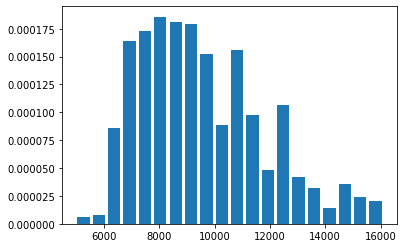

In [103]:
plt.hist(df_no_outliers.target,bins=20,rwidth=0.8,density=True)

In [101]:
# if this is not bell curved than this is not normal distributed

In [104]:
# If still not normally distributed, then you may consider using non-parametric tests.

In [ ]:
# kewness is a measure of the asymmetry of a distribution. This value can be positive or negative.

# A negative skew indicates that the tail is on the left side of the distribution, 
# which extends towards more negative values.
# A positive skew indicates that the tail is on the right side of the distribution,
#  which extends towards more positive values.
# A value of zero indicates that there is no skewness in the distribution at all,
#  meaning the distribution is perfectly symmetrical.
# Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

# The kurtosis of a normal distribution is 3.
# If a given distribution has a kurtosis less than 3, it is said to be playkurtic,
#  which means it tends to produce fewer and less extreme outliers than the normal distribution.
# If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic,
#  which means it tends to produce more outliers than the normal distribution.

In [110]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
#calculate sample skewness
skew(df_no_outliers.target, bias=False)



#calculate sample kurtosis


0.7205950994403629

In [108]:
kurtosis(df_no_outliers.target, bias=False)


-0.0684965315597279

In [111]:
# Encoding

df.drop(['f1','f4','f5'],axis=1,inplace=True)

In [112]:
df.head()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
10523854,7195215.0,7200.0,7195215.0,7200.0,alpha,True,35.0,1,7124.0
19046479,3523664.0,7200.0,3523664.0,7200.0,alpha,True,20.0,1,7524.0
6501169,1682032.0,7200.0,1682032.0,7200.0,alpha,True,15.0,1,7796.0
13926072,617946.0,7200.0,617946.0,7200.0,alpha,True,15.0,1,14945.0
17290617,163185.0,7200.0,163185.0,7200.0,omega,True,20.0,1,7950.0


In [113]:
# encoding to change 
# we will do encoding using sklearn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [115]:
df['f6'] = le.fit_transform(df['f6'])
df['f7'] = le.fit_transform(df['f7'])
df['f8'] = le.fit_transform(df['f8'])

In [116]:
df.head()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
10523854,7195215.0,7200.0,7195215.0,7200.0,0,1,4,1,7124.0
19046479,3523664.0,7200.0,3523664.0,7200.0,0,1,2,1,7524.0
6501169,1682032.0,7200.0,1682032.0,7200.0,0,1,1,1,7796.0
13926072,617946.0,7200.0,617946.0,7200.0,0,1,1,1,14945.0
17290617,163185.0,7200.0,163185.0,7200.0,3,1,2,1,7950.0


In [117]:
df.describe()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.338716e+06,7161.876000,1.338716e+06,7161.876000,0.989200,0.994200,2.317600,0.957200,10160.470000
std,1.640579e+06,169.697849,1.640579e+06,169.697849,0.958367,0.075944,1.237674,0.604517,3456.619042
min,1.938000e+03,6900.000000,1.938000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.492730e+05,7140.000000,3.492730e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7870.000000
50%,8.643320e+05,7200.000000,8.643320e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.727807e+06,7200.000000,1.727807e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11282.000000
max,1.932566e+07,7800.000000,1.932566e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,35000.000000


(array([[5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.000000

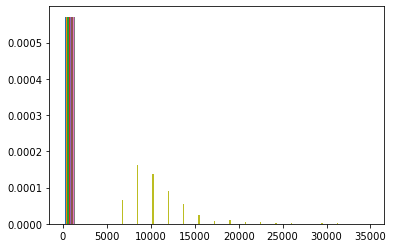

In [122]:
plt.hist(df,bins=20,rwidth=0.8,density=True)

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

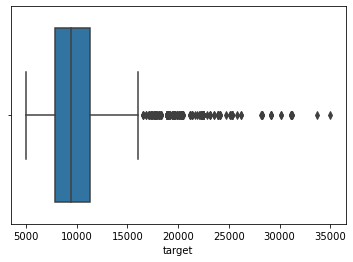

In [125]:
sns.boxplot(df.target)

In [118]:
##now e scale data to normlise data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Time_to_dep(s)'] =sc.fit_transform( df['Time_to_dep(s)'])
df['Travel_time(s)'] = sc.fit_transform(df['Travel_time(s)'])
df['target'] = sc.fit_transform(df['Travel_time(s)'])

In [119]:
df.head()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
10523854,3.570133,0.224681,3.570133,0.224681,0,1,4,1,7124.0
19046479,1.331948,0.224681,1.331948,0.224681,0,1,2,1,7524.0
6501169,0.209286,0.224681,0.209286,0.224681,0,1,1,1,7796.0
13926072,-0.439383,0.224681,-0.439383,0.224681,0,1,1,1,14945.0
17290617,-0.716606,0.224681,-0.716606,0.224681,3,1,2,1,7950.0


In [120]:
df.describe()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.857537e-17,-1.071143e-15,5.857537e-17,-1.071143e-15,0.989200,0.994200,2.317600,0.957200,10160.470000
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,0.958367,0.075944,1.237674,0.604517,3456.619042
min,-8.149026e-01,-1.543344e+00,-8.149026e-01,-1.543344e+00,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,-6.031665e-01,-1.289244e-01,-6.031665e-01,-1.289244e-01,0.000000,1.000000,2.000000,1.000000,7870.000000
50%,-2.891855e-01,2.246806e-01,-2.891855e-01,2.246806e-01,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,2.371903e-01,2.246806e-01,2.371903e-01,2.246806e-01,2.000000,1.000000,3.000000,1.000000,11282.000000
max,1.096488e+01,3.760730e+00,1.096488e+01,3.760730e+00,3.000000,1.000000,6.000000,2.000000,35000.000000


(array([[5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.71403375e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.000000

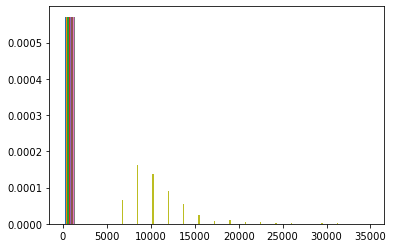

In [121]:
plt.hist(df,bins=20,rwidth=0.8,density=True)

In [129]:
## now split the data into x and y


In [130]:
X = df.drop(['target'],axis=1)
y = df['target']

In [132]:
X

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9
10523854,3.570133,0.224681,3.570133,0.224681,0,1,4,1
19046479,1.331948,0.224681,1.331948,0.224681,0,1,2,1
6501169,0.209286,0.224681,0.209286,0.224681,0,1,1,1
13926072,-0.439383,0.224681,-0.439383,0.224681,0,1,1,1
17290617,-0.716606,0.224681,-0.716606,0.224681,3,1,2,1
...,...,...,...,...,...,...,...,...
17299949,-0.621266,0.224681,-0.621266,0.224681,2,1,2,1
5960793,-0.106977,0.224681,-0.106977,0.224681,2,1,2,1
15153808,-0.731252,0.224681,-0.731252,0.224681,0,1,1,1
4353492,-0.666438,-1.543344,-0.666438,-1.543344,1,1,2,0


In [133]:
y

10523854     7124.0
19046479     7524.0
6501169      7796.0
13926072    14945.0
17290617     7950.0
             ...   
17299949     6870.0
5960793      7640.0
15153808     6810.0
4353492      8050.0
16858565     7765.0
Name: target, Length: 5000, dtype: float64

## ML Modeling

In [134]:
# because y is numeric thats why we choose regression or algos
# y is tartget value

In [135]:
# These libraries used for target value that is numeric we compute things accordingly
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [136]:
# root mean square error

In [137]:
lr= LinearRegression()
dt =DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [138]:
# Now we apply all models on data and whos accuracy is great we will select and print result


In [153]:
y_train

10636441     6850.0
17343100     6810.0
19977778     7950.0
10021547     6375.0
16570190     8300.0
             ...   
13518818    10545.0
9917242      6900.0
11649227     9497.0
20016623    14645.0
14444565     6440.0
Name: target, Length: 4000, dtype: float64

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

for i in [lr,dt,svr,knn]: # read all models
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    test_score = r2_score(y_test,pred)
    train_scrore = r2_score(y_train,i.predict(X_train))
    if abs(train_scrore -train_scrore)  <=0.1:
       print(i)
       print('r2 score is :' ,test_score)
       print('Mean absolute error is :',mean_absolute_error(y_test,pred))
       print('Mean squared error is :',mean_squared_error(y_test,pred))
       print('RMSE :',mean_squared_error(y_test,pred,squared=False))
       print('---------------------------------------------')


   

LinearRegression()
r2 score is : 0.08761361768569065
Mean absolute error is : 2215.566142256806
Mean squared error is : 9132144.718498196
RMSE : 3021.9438642202135
---------------------------------------------
DecisionTreeRegressor()
r2 score is : -0.6928744527434734
Mean absolute error is : 2807.488
Mean squared error is : 16944109.198
RMSE : 4116.32229034608
---------------------------------------------
SVR()
r2 score is : -0.04515994314987282
Mean absolute error is : 2214.7719739204504
Mean squared error is : 10461085.390831675
RMSE : 3234.360120770672
---------------------------------------------
KNeighborsRegressor()
r2 score is : -0.027537400290457592
Mean absolute error is : 2278.9768
Mean squared error is : 10284700.01856
RMSE : 3206.976772376127
---------------------------------------------


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

for i in [lr,dt,svr,knn]: # read all models
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    test_score = r2_score(y_test,pred)
    train_scrore = r2_score(y_train,i.predict(X_train))
    if abs(train_scrore -train_scrore)  <=0.1:
       print(i)
       print('r2 score is :' ,test_score)
       print('Mean absolute error is :',mean_absolute_error(y_test,pred))
       print('Mean squared error is :',mean_squared_error(y_test,pred))
       print('RMSE :',mean_squared_error(y_test,pred,squared=False))
       print('---------------------------------------------')

LinearRegression()
r2 score is : 0.08160580601060397
Mean absolute error is : 2293.574712961391
Mean squared error is : 9863166.460752655
RMSE : 3140.567856415883
---------------------------------------------
DecisionTreeRegressor()
r2 score is : -0.7582121127263994
Mean absolute error is : 2972.728
Mean squared error is : 18882456.852
RMSE : 4345.3949017321775
---------------------------------------------
SVR()
r2 score is : -0.03132263763516496
Mean absolute error is : 2266.8356076357686
Mean squared error is : 11075970.336388659
RMSE : 3328.058042821468
---------------------------------------------
KNeighborsRegressor()
r2 score is : -0.010517810391352134
Mean absolute error is : 2331.9085333333333
Mean squared error is : 10852535.262826666
RMSE : 3294.3186340769566
---------------------------------------------


In [156]:
df_test = pd.read_csv("sastaticket_test.csv")

In [165]:
df.head()

,Time_to_dep(s),Travel_time(s),Time_to_dep(s),Travel_time(s),f6,f7,f8,f9,target
10523854,3.570133,0.224681,3.570133,0.224681,0,1,4,1,7124.0
19046479,1.331948,0.224681,1.331948,0.224681,0,1,2,1,7524.0
6501169,0.209286,0.224681,0.209286,0.224681,0,1,1,1,7796.0
13926072,-0.439383,0.224681,-0.439383,0.224681,0,1,1,1,14945.0
17290617,-0.716606,0.224681,-0.716606,0.224681,3,1,2,1,7950.0


In [162]:
df_test

,Time_to_dep(s),Travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,781708.0,7200.0,2021-09-26 15:56:31.262343+00:00,2021-10-05 17:05:00+00:00,2021-10-05 19:05:00+00:00,omega,True,20.0,1
1,336287.0,7200.0,2021-09-02 19:40:12.364712+00:00,2021-09-06 17:05:00+00:00,2021-09-06 19:05:00+00:00,omega,True,20.0,1
2,470952.0,7200.0,2021-09-08 18:40:47.210256+00:00,2021-09-14 05:30:00+00:00,2021-09-14 07:30:00+00:00,gamma,True,20.0,2
3,260006.0,6900.0,2021-09-05 10:46:33.591907+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,True,40.0,0
4,86906.0,7200.0,2021-09-21 10:41:33.661454+00:00,2021-09-22 10:50:00+00:00,2021-09-22 12:50:00+00:00,omega,True,20.0,1
...,...,...,...,...,...,...,...,...,...
245,953443.0,7140.0,2021-09-09 16:09:16.789631+00:00,2021-09-20 17:00:00+00:00,2021-09-20 18:59:00+00:00,gamma,True,20.0,2
246,2689298.0,7200.0,2021-09-29 06:58:21.470496+00:00,2021-10-30 10:00:00+00:00,2021-10-30 12:00:00+00:00,alpha,True,20.0,1
247,1539152.0,7200.0,2021-09-20 15:27:27.147893+00:00,2021-10-08 11:00:00+00:00,2021-10-08 13:00:00+00:00,gamma,True,20.0,1
248,606689.0,7140.0,2021-09-08 16:28:30.978464+00:00,2021-09-15 17:00:00+00:00,2021-09-15 18:59:00+00:00,gamma,True,20.0,2


In [163]:
## now we predict with machine learning model with df_test thar we saved above for testing


In [164]:
lr = LinearRegression().fit(X,y)
lr.predict(df_test)

c:\Users\Biscode\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- f1
- f4
- f5
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Biscode\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [172]:
#  This is used to convert time into hours or days and seconds
# def convert(seconds):
#     seconds = seconds % (24 * 3600) 
#     hour = seconds // 3600 
#     seconds %= 3688 
#     minutes = seconds // 60 
#     seconds %= 60
#     return '%d:%02d:%02d' % (hour,minutes,seconds) 
#     # column addition 
# df['time_1'] = df['time_to_dep(s) '].apply(convert) 
# df['time_2'] = df[ 'travel_time(s)'].apply(convert) 
# df.sample(100)
    

KeyError: 'time_to_dep(s) '

In [ ]:
##Incomplete